In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census.

Problem Statement:

In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.



Tasks To Be Performed:

1. Perform Exploratory Data Analysis to find key insights.

2. Use various machine learning algorithms to predict the response variable.

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score

In [153]:
data=pd.read_csv('adult.csv')

In [154]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [155]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [156]:
data.shape

(48842, 15)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [158]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [159]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [160]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

### So there are 2799 data with ? as value in 'workclass' column. So need to remove it

In [161]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

### So there are 2809 data with ? as value in 'occupation' column. So need to remove it

In [162]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### So there are 857 data with value ? in the 'native-country' column. So we need to remove it

In [163]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [164]:
data.replace('?',np.nan,inplace=True)

In [165]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [166]:
data=data.dropna()
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [167]:
data.shape

(45222, 15)

In [168]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_4048\2795208246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['age'])


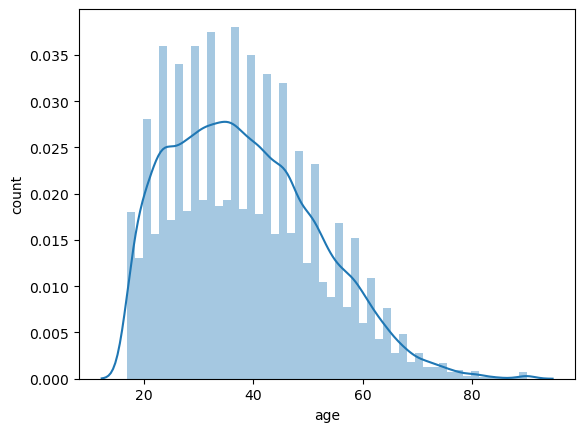

In [169]:
sns.distplot(x=data['age'])
plt.xlabel("age")
plt.ylabel("count")
plt.show()

### Label Encoding

In [170]:
col_list=[]
for i in data.columns:
    if data[i].dtype=='object':
        col_list.append(i)
        
le=LabelEncoder()
for j in col_list:
    data[j]=le.fit_transform(data[j])

In [171]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass        45222 non-null  int32
 2   fnlwgt           45222 non-null  int64
 3   education        45222 non-null  int32
 4   educational-num  45222 non-null  int64
 5   marital-status   45222 non-null  int32
 6   occupation       45222 non-null  int32
 7   relationship     45222 non-null  int32
 8   race             45222 non-null  int32
 9   gender           45222 non-null  int32
 10  capital-gain     45222 non-null  int64
 11  capital-loss     45222 non-null  int64
 12  hours-per-week   45222 non-null  int64
 13  native-country   45222 non-null  int32
 14  income           45222 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 4.0 MB


### Outlier Detection and Handling

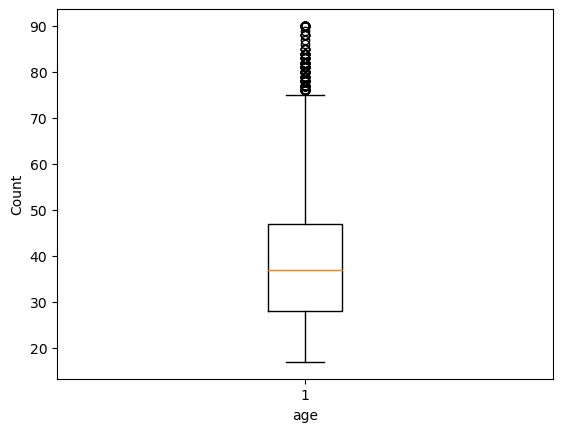

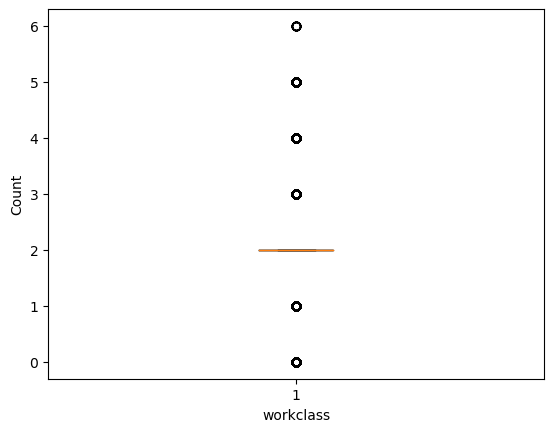

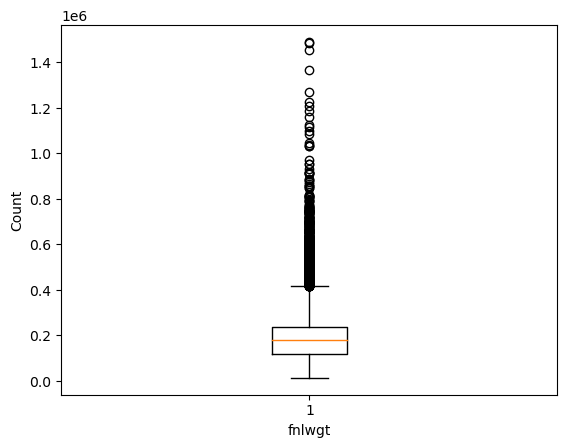

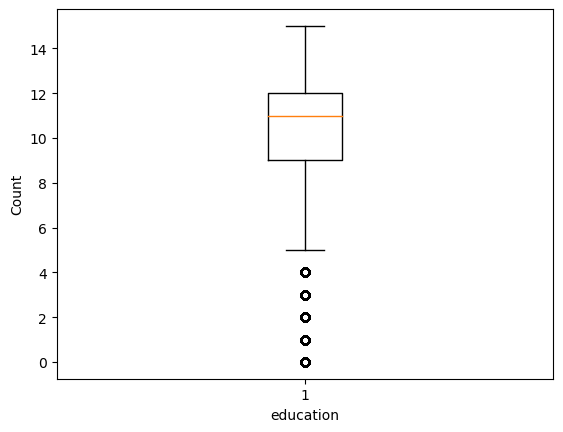

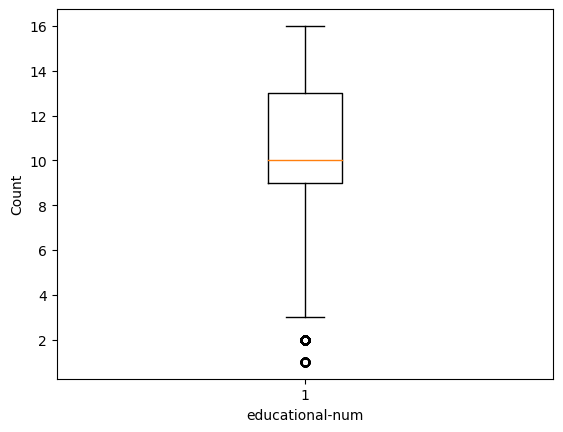

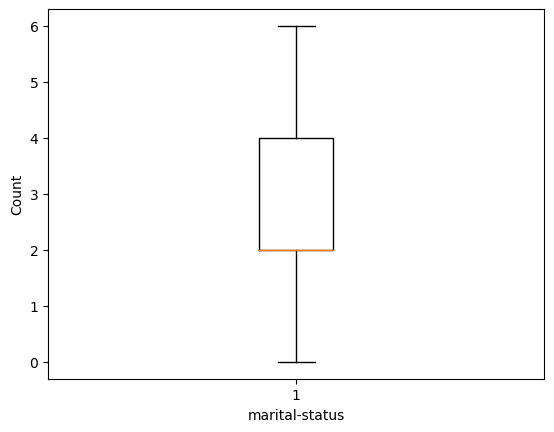

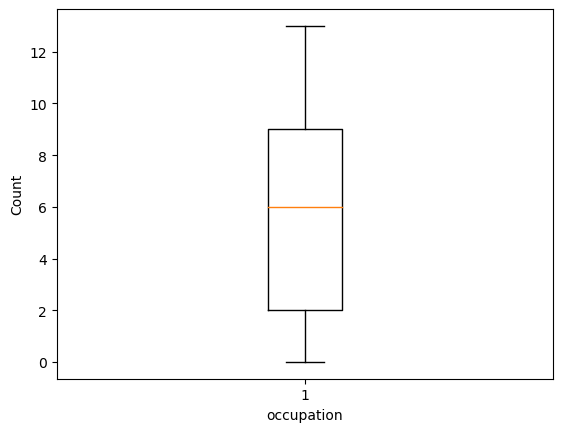

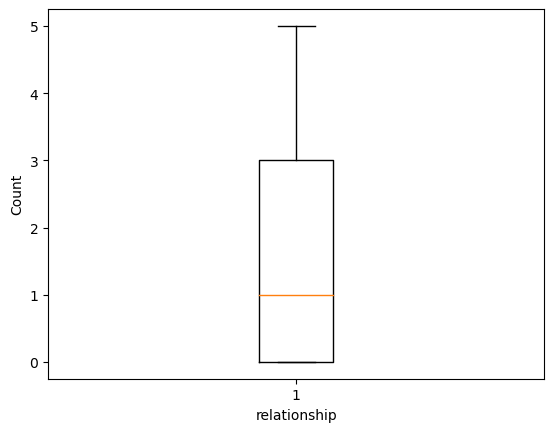

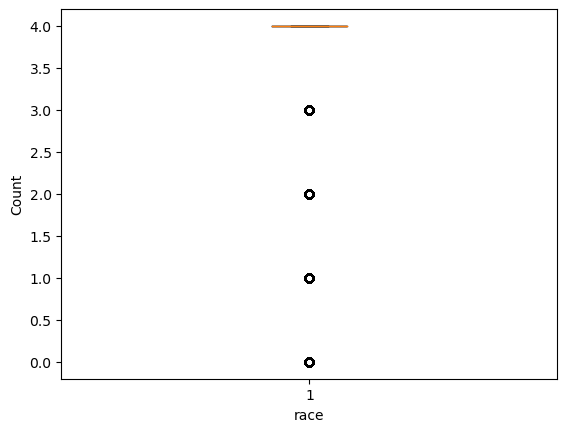

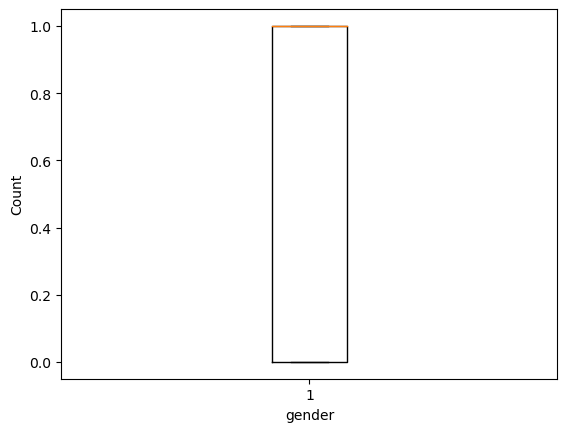

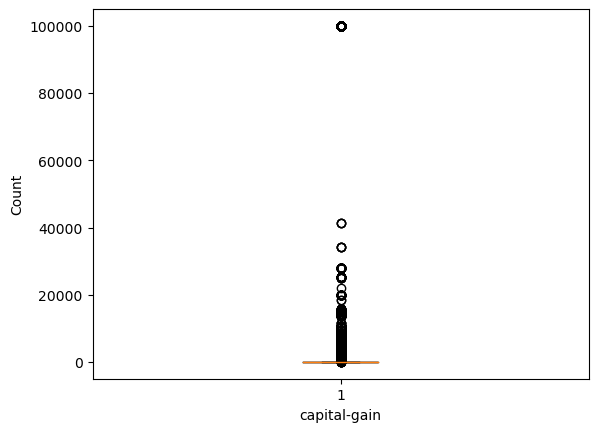

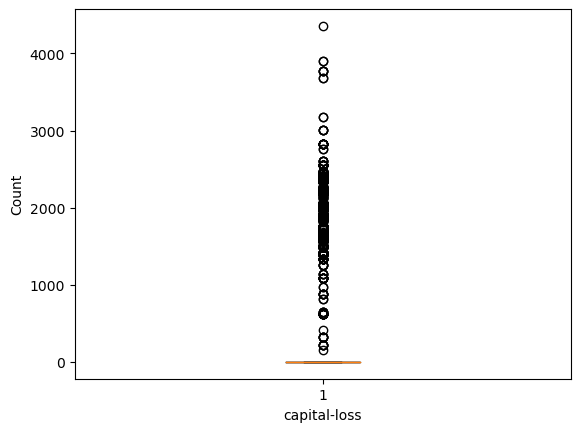

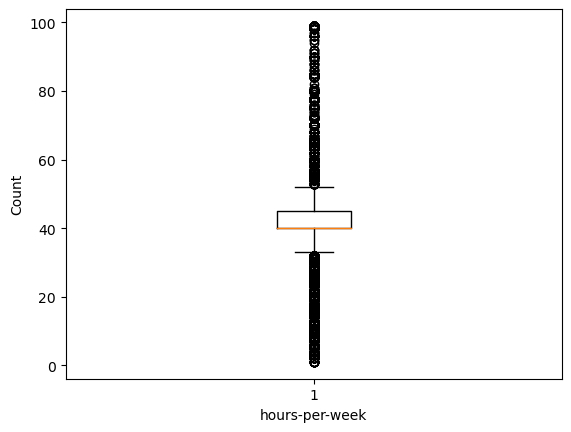

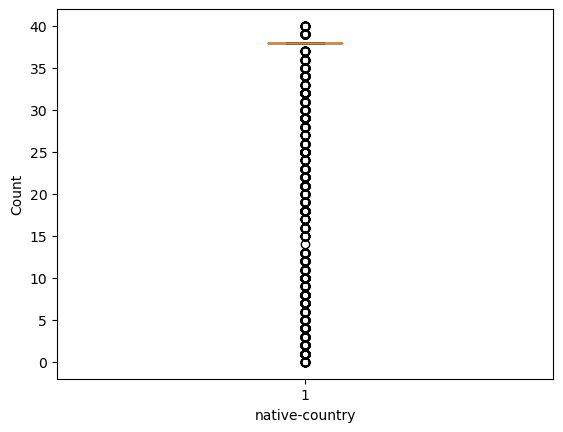

In [173]:
for a in data.columns:
    if (a!='income'):
        plt.boxplot(data[a])
        plt.xlabel(a)
        plt.ylabel('Count')
        plt.show()

### VIF

In [174]:
c=[]
for j in data.columns:
    if(j!='income'):
        c.append(j)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,r) for r in range(len(x.columns))]
vif_data

,Features,VIF
0,age,9.369182
1,workclass,6.241622
2,fnlwgt,4.036062
3,education,9.380354
4,educational-num,19.029045
5,marital-status,4.014737
6,occupation,3.209954
7,relationship,2.614830
8,race,18.524808
9,gender,4.560430


In [175]:
data=data.drop(['native-country'],axis=1)

In [176]:
c=[]
for j in data.columns:
    if(j!='income'):
        c.append(j)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,r) for r in range(len(x.columns))]
vif_data

,Features,VIF
0,age,8.905799
1,workclass,6.198246
2,fnlwgt,4.012796
3,education,9.230284
4,educational-num,18.098980
5,marital-status,3.893570
6,occupation,3.198760
7,relationship,2.489127
8,race,16.010107
9,gender,4.487461


In [177]:
data=data.drop(['educational-num'],axis=1)

In [178]:
c=[]
for j in data.columns:
    if(j!='income'):
        c.append(j)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,r) for r in range(len(x.columns))]
vif_data

,Features,VIF
0,age,8.697566
1,workclass,6.152689
2,fnlwgt,4.001361
3,education,7.559291
4,marital-status,3.852179
5,occupation,3.121683
6,relationship,2.477414
7,race,15.337348
8,gender,4.486337
9,capital-gain,1.035471


In [179]:
data=data.drop(['race'],axis=1)

In [180]:
c=[]
for j in data.columns:
    if(j!='income'):
        c.append(j)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,r) for r in range(len(x.columns))]
vif_data

,Features,VIF
0,age,8.001409
1,workclass,5.977358
2,fnlwgt,3.940680
3,education,7.229701
4,marital-status,3.731325
5,occupation,3.091089
6,relationship,2.402864
7,gender,4.338660
8,capital-gain,1.034804
9,capital-loss,1.057743


In [181]:
data=data.drop(['hours-per-week'],axis=1)

In [182]:
c=[]
for j in data.columns:
    if(j!='income'):
        c.append(j)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,r) for r in range(len(x.columns))]
vif_data

,Features,VIF
0,age,7.098793
1,workclass,5.808132
2,fnlwgt,3.867258
3,education,6.655630
4,marital-status,3.712720
5,occupation,3.052412
6,relationship,2.382019
7,gender,3.972057
8,capital-gain,1.032946
9,capital-loss,1.056479


In [183]:
data=data.drop(['age'],axis=1)

In [184]:
c=[]
for j in data.columns:
    if(j!='income'):
        c.append(j)
        
x=data[c]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,r) for r in range(len(x.columns))]
vif_data

,Features,VIF
0,workclass,5.203254
1,fnlwgt,3.777992
2,education,5.896489
3,marital-status,3.712516
4,occupation,2.977881
5,relationship,2.376258
6,gender,3.808052
7,capital-gain,1.029646
8,capital-loss,1.052676


In [185]:
x

,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss
0,2,226802,1,4,6,3,1,0,0
1,2,89814,11,2,4,0,1,0,0
2,1,336951,7,2,10,0,1,0,0
3,2,160323,15,2,6,0,1,7688,0
5,2,198693,0,4,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...
48837,2,257302,7,2,12,5,0,0,0
48838,2,154374,11,2,6,0,1,0,0
48839,2,151910,11,6,0,4,0,0,0
48840,2,201490,11,4,0,3,1,0,0


In [186]:
y=data['income']

In [187]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=30)

### Standard Scailing

In [192]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

### Logistic Regression

In [207]:
lrr=LogisticRegression()
lrr.fit(xtrain,ytrain)

LogisticRegression()

In [209]:
lrrpred=lrr.predict(xtest)

In [210]:
confusion_matrix(lrrpred,ytest)

array([[6637, 1614],
       [ 199,  595]], dtype=int64)

In [211]:
accuracy_score(lrrpred,ytest)

0.7995577667219458

### Decision Tree 

In [212]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [213]:
dtcpred=dtc.predict(xtest)

In [214]:
confusion_matrix(dtcpred,ytest)

array([[5931,  858],
       [ 905, 1351]], dtype=int64)

In [216]:
accuracy_score(dtcpred,ytest)

0.805085682697623

### Random Forest

In [217]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [218]:
rfcpred=rfc.predict(xtest)

In [219]:
confusion_matrix(rfcpred,ytest)

array([[6160,  882],
       [ 676, 1327]], dtype=int64)

In [220]:
accuracy_score(rfcpred,ytest)

0.8277501381978994

### KNN

In [222]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
knc.fit(xtrain,ytrain)

KNeighborsClassifier()

In [223]:
kncpred=knc.predict(xtest)

In [224]:
confusion_matrix(kncpred,ytest)

array([[6207,  925],
       [ 629, 1284]], dtype=int64)

In [225]:
accuracy_score(kncpred,ytest)

0.8281923714759536

### XgBoost

In [239]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [240]:
xgbcpred=xgbc.predict(xtest)

In [241]:
confusion_matrix(xgbcpred,ytest)

array([[6420,  807],
       [ 416, 1402]], dtype=int64)

In [242]:
accuracy_score(xgbcpred,ytest)

0.8647871752349364

### So XgBoost is the best model

### Hyperparameter Tuning

In [231]:
from sklearn.model_selection import GridSearchCV

In [249]:
param_grid={
    'n_estimators':[100,200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth':[None,5,10]
}

In [250]:
gs=GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid,cv=3)

In [251]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [246]:
print("best hyperparameters ", gs.best_params_)
best_xg=gs.best_estimator_
print(best_xg)

best hyperparameters  {'learning_rate': 0.1, 'max-depth': None, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max-depth=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [247]:
newpred = best_xg.predict(xtest)

In [248]:
accuracy_score(newpred,ytest)

0.8654505251520177